In [4]:
# Importing libraries for classic Python operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importing libraries for model selection
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Importing libraries for results analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn
from matplotlib.pylab import rcParams

# Importing the library for the model under test
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree


# Random Forest

## I) Theory

### 1) Decision Tree

A Decision tree is a structure where internal node represent a test on an feature, each branch representing a test with this feature and each leaf has a class 

The algorithm will "learned" by subdividing the data depending on the value of the feature. This method is repeated recursively on each derived subset. When the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions, the recursion is finished.

### 2) Bagging 

A bagging is an ensemble method that fits decision trees on random subsets of the original dataset, then aggregates their  predictions to generate a final prediction. It is used to reduce the variance of the estimator by introducing randomization into its building mechanism and then constructing an ensemble from it.

Bagging lowers overfitting (variance) by averaging or voting; nevertheless, this increases bias, which is offset by the decrease in variance.

### 3) Random Forest

The aim of random forests is to reduce the variance between the scores of different classes by averaging a set of observations. The method is based on decision trees.

A decision tree is a decision-making tool that represents a set of choices in the graphical form of a tree. The leaves of such a tree represent the possible values, and the branches the combinations of input variables leading to that value.

The decision tree concept is that it aids in the selection of acceptable attributes for breaking the tree into subparts.

In the case of a classification problem, the majority voting classifier is used to determine the final output. The final output of a regression problem is the mean of all the outputs. Aggregation is the name of this section.

There are three main steps:

- Bootstrap: generates samples by random draw with discount;
- Bagging: training random decision trees from these samples on the training set;
- Prediction: applying the decision rules from the previous trees to a test set.

During prediction, the algorithm takes a majority vote, choosing the class predicted by the most trees.


## II) Advantages and Drawbacks

The advantages of this method are :
- speed,
- its ability to manage large databases,
- its ability to handle missing values.Even in the face of disruptions, especially when large sets of data go missing, random forests can still maintain good accuracy. 
- its ability to reduce overfitting by using multiple decision trees. They have much less variance when compared to a single decision tree.
- They are very flexible and deliver highly accurate results

Drawbacks
- Random Forests algorithms usually involve a lot of complexities. 
- Constructing Random forests usually requires much more time and effort than decision trees.
- They tend to be less intuitive especially when there is a large collection of decision trees involved. 
- Usually involves many computational resources for the implementation of the Random tree algorithm.


## III) Python Implementation

###  1) Gini or Entropy for Random Forest

Firstly, for classification, there are two possible choices Gini or Entropy

The Entropy or the Gini are tree-splitting criterions. When your decision tree has to make a “split” in your data, it makes that split at that particular root node that minimizes the Entropy or Gini.

In this project due to the imbalanced data the Entropy is stronger in this particular situation compared to Gini. The logarithm with the Entropy will increase the "strengh" of small classes.

Having said this, Gini is usually less computationally expensive to calculate as it does not compute a logarithm. The Scikit-Learn implementation of RandomForestClassifier allows us to choose from both, so it might be worth trying both measures and seeing which leads to an smaller error.

Conclusion: fine tuning the split criteria could lead to different forests, and as there is only two possible values, we recommend trying them both for classification forests.

### 2) Class weight 

!!!!!!!!! à rajouter !!!!!!!!!

### 3) Tune Hyperparameters

This goal of this part is to prevent the model from underfitting or overfitting with different hyperparameters available with this model. Overfitting occurs when a model learns both the pattern and the noise of the data on which it is trained. In our case, an example would be fruit juices. In our database, most fruit juices are naturally orange juice. The model could initially take the word "juice" as a decision criterion for whether it's a fruit juice. But the model could overfits if it also takes the word "orange", since if a new product arrives and it's an apple juice, it will no longer categorize it as a fruit juice. The model, in particular, detects patterns that are distinctive to the observations in the training data but do not generalize to other observations. As a result, the model can make excellent predictions on the data it was trained on but cannot make effective predictions on data it did not encounter during training.

To reduce the overfitting we will also use cross validation during the hyperparameters selection.

#### Random Forest Hyperparameters

Generally speaking, the random forest algorithm is not very sensitive to hyperparameters compared to other models, but it is still very important to play with certain parameters to improve results.
We will be testing at least three to four values for each hyperparameter. Include at least one value at the low end of the suggested range, one at the high end of the recommended range, and one in the middle of the recommended range.

1. n_estimators
The hyperparameter n_estimator specifies the number of trees to be employed in the model. The sub-divisions are likewise represented by the tree. The total number of decision trees in the forest

2. max_features
The given dataset should have many features/variables to predict the label/target in order to train the Machine Learning model. Max_features restricts a count to select the most features from each tree. 

3. max_depth
Max_depth determines the maximum number of splits each tree can take. If the max_depth is too low, the model will be trained less and have a high bias, leading the model to underfit. In the same way, if the max_depth is high, the model learns too much and leads to high variance, leading the model to overfit.

Max_leaf_nodes, Max_sample, Min_sample_split are other parameters that we won't consider here, because they are less important for our project


In [2]:
X_test = pd.read_csv(r"C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\X_test.csv", index_col=[0])
X_train = pd.read_csv(r"C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\X_train.csv", index_col=[0])
y_test = pd.read_csv(r"C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\y_test.csv", index_col=[0])
y_train = pd.read_csv(r"C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\y_train.csv", index_col=[0])

In [19]:



PATH = r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv'

param_grid = {
    'bootstrap': [True],
    'criterion' : ['entropy'],
    'class_weight' : ['balanced'],
    'max_depth': [25, 45, 60],
    'max_features': [20, 40],
    'n_estimators': [25, 50, 75]
}# Create a based model

def model_best_param(PATH, model, params):
    
    df = pd.read_csv(PATH)
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop(labels=22426, axis=0)

    y = df[["Secteur"]]
    df_features = df.drop(["Code_produit", "Secteur", "Famille"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

    pipe_nb = make_pipeline(
    model()
    )
    grid_search = GridSearchCV(estimator=model(), param_grid=params, verbose=2, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train.values.ravel())

    output = grid_search.predict(X_test)

    return(grid_search.best_params_, metrics.accuracy_score(y_test, output), metrics.f1_score(y_test, output, average='macro'))


In [41]:

import matplotlib.pyplot as plt

PATH = r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv'
model = RFC
param = "n_estimators"
min = 30
max = 200
steps = 30

def model_study_param(PATH, model, param, min, max, steps):

    df = pd.read_csv(PATH)
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop(labels=22426, axis=0)

    y = df[["Secteur"]]
    df_features = df.drop(["Code_produit", "Secteur", "Famille"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

    opt_table_estimators_accuracy=list()
    opt_table_estimators_f1=list()

    for i in range(min, max, steps):
        model = RFC(n_estimators = i, criterion = 'entropy', class_weight = "balanced")
        model.fit(X_train,y_train.values.ravel())
        output=model.predict(X_test)
        opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
        opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
    plt.plot(range(min, max, steps), opt_table_estimators_accuracy)
    plt.plot(range(min, max, steps), opt_table_estimators_f1)
    plt.xlabel('Number of trees')
    plt.ylabel('Random Forest Score')
    plt.title('Random Forest Score VS Number of trees (5 features)')
    plt.show()
    return(opt_table_estimators_accuracy, opt_table_estimators_f1)


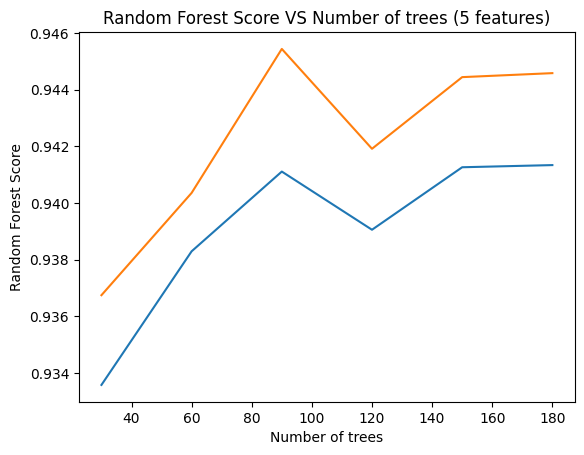

([0.9335866261398176,
  0.9382978723404255,
  0.9411094224924013,
  0.9390577507598784,
  0.9412613981762918,
  0.9413373860182371],
 [0.9367503561454025,
  0.9403571835310951,
  0.945433475822137,
  0.9419126470329116,
  0.9444389242586936,
  0.9445795411437129])

In [42]:
model_study_param(PATH, model, param, min, max, steps)

### 2) Study of the various hyperparameters

Next, we'll look at each of the hyperparameters to understand the consequences of changing them on the model.

#### Nº of Trees in the forest:

By building forests with a large number of trees (high number of estimators) we can create a more robust aggregate model with less variance, at the cost of a greater training time. Most times the secret here is to evaluate your data: how much data is available, and how many features does each observation have.

Because of the randomness of Random Forest, if you have a lot of features and a small number of trees some features with high predictive power could get left out of the forest and not be used whatsoever, or be used very little.

The same applies for the data: if you have a lot of observations and you are not using the whole dataset to train each tree, if you have a small number of trees, then some observations could be left out.

As Random Forests rarely overfit, in practice you can use a large number of trees to avoid these problems, and get good results following the guideline that when all other hyper-parameters are fixed, increasing the number of trees generally reduces model error at the cost of a higher training time.

Don’t be fooled by this statement though, building a forest with 10K trees is a crazy and useless approach: the main takeaway is that as you increase the nº of trees you will be reducing model variance and generally model error would approximate an optimum value.

Conclusion: fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable number and you’re good to go.

C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: 

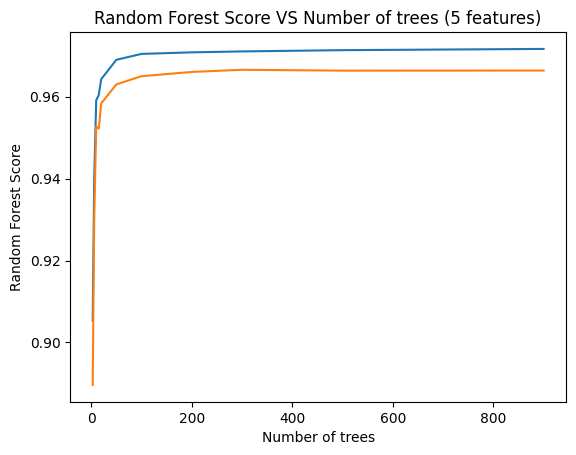

In [10]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [3, 6, 10, 15, 20, 50, 100, 200, 300, 500, 900]

for i in list_para:
    forest=RFC(n_estimators=i, criterion = 'entropy', class_weight = "balanced")
    forest.fit(X_train, y_train)
    output=forest.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()


In [13]:
opt_table_estimators_accuracy #3

[0.9053191489361702,
 0.9398936170212766,
 0.9591185410334346,
 0.9604103343465046,
 0.9642857142857143,
 0.9689969604863222,
 0.9704407294832826,
 0.9708206686930091,
 0.971048632218845,
 0.9713525835866261,
 0.9716565349544073]

In [12]:
opt_table_estimators_f1 #3

[0.8896229478102924,
 0.9298894204493278,
 0.9527545641578856,
 0.9521957660847389,
 0.9583644447998592,
 0.9629935574720319,
 0.9649960299656684,
 0.9660361637090671,
 0.9665642213987493,
 0.9663550648940736,
 0.9663784101138911]

In [9]:
opt_table_estimators_f1 #2

[0.8978382898539268,
 0.9346869043568852,
 0.9470872653654087,
 0.9549854465644478,
 0.9588371673950411,
 0.9627000410407675,
 0.9643427930563385,
 0.9652755389893093,
 0.9665341989482285,
 0.9659310001858801,
 0.9665328502914091]

In [7]:
opt_table_estimators_accuracy #2

[0.914741641337386,
 0.9437689969604863,
 0.9558510638297872,
 0.9620820668693009,
 0.9651215805471125,
 0.9684650455927052,
 0.9697568389057751,
 0.9706686930091185,
 0.9719604863221885,
 0.9712006079027355,
 0.9716565349544073]

In [19]:
opt_table_estimators_f1 #1

[0.8173569385426058,
 0.8873186154451341,
 0.9125743631793154,
 0.9286714436885601,
 0.9331959035054886,
 0.9400468326715874,
 0.9439822459072257,
 0.9456226472369808,
 0.9464231833811403,
 0.9462222890289951,
 0.9464700384570709]

We can see that we can take a number of tree between 25 and 75 for the rest of the project to tune other hyperparameters
We will take values between 200 and 400 for the rest of the project.

This parameter reduces variance. Indeed, the more you increase it, the more the variance is reduced. However, there's no point in increasing it too much, as this would take too much execution time. We can see that from 300 onwards, the f1 score no longer increases and even decreases a little, so we'll select 300 for the rest of the project.

#### The Maximum Depth of the Individual Trees :

Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account. The deeper the tree, the more splits it has and the more information about the data it takes into account.

In an individual tree this causes overfitting, however in Random Forest, because of the way the ensemble is built, it is harder to overfit, although it is still possible for large depth values.

This parameter should be set to a reasonable amount depending on the number of features of your tree: don’t build stumps (really shallow trees) nor insanely big trees; set this parameter to a reasonable amount and tune it a little bit if you want, but changes around a reasonable value do not impact the performance of your forest greatly, so you don’t have to include it in a procedure like Grid Search if you don’t want.

Conclusion: fine tuning the tree depth is unnecessary, pick a reasonable value and carry on with other hyperparameters.


C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: 

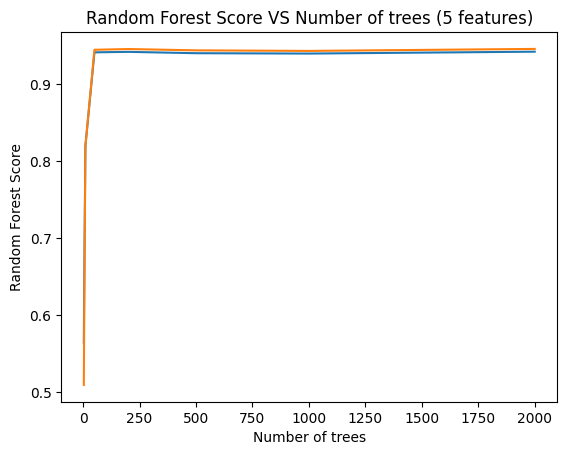

In [20]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [3, 6, 10, 50, 200, 500, 1000, 2000]

for i in list_para:
    forest=RFC(max_depth=i, criterion = 'entropy', class_weight = "balanced")
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

In [21]:
opt_table_estimators_f1

[0.5097509709926871,
 0.6575333736733056,
 0.8191978045905534,
 0.9444027408237728,
 0.9453753190872166,
 0.9436704234512514,
 0.9429380305409426,
 0.9455252657785777]

In the same way, from 200 onwards, we can see that the f1 score decreases, this time indicating the presence of overfitting. We'll leave the parameter at 200 for the rest of the project.


#### Number of features considered at each split

Another parameter to consider while developing a random forest model is the amount of characteristics examined at each split. There are a few typical heuristics that can assist you in determining which values to test for this parameter. The square root of the total number of features and one-third of the total number of features are two popular examples. 

In [25]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
#list_para = [3, 6, 10, 50, 200, 500, 1000]
list_para = [3, 6, 10, 50]
for i in list_para:
    forest=RFC(max_features=i, criterion = 'entropy', class_weight = "balanced")
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

### 3) Grid Search Automatisation

Grid Search CV 

In [8]:
from sklearn.metrics import confusion_matrix

params = {
    'bootstrap': [True],
    'criterion' : ['entropy'],
    'class_weight' : ['balanced'],
    'max_depth': [200],
    'max_features': [40],
    'n_estimators': [300]
}# Create a based model
model = RFC()# Instantiate the grid search model


def model_best_param(X_train, X_test, y_train, y_test, model, params):

    pipe_nb = make_pipeline(
    RFC()
    )
    grid_search = GridSearchCV(estimator=RFC(), param_grid=params, verbose=2, cv=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    output = grid_search.predict(X_test)
    

    conf_mat = confusion_matrix(y_test, output)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = pd.unique([item for sublist in y_test.values for item in sublist]))
    conf_mat = pd.DataFrame(conf_mat, index=pd.unique([item for sublist in y_test.values for item in sublist]), columns= pd.unique([item for sublist in y_test.values for item in sublist]))


    print(classification_report(y_test, output))

    return(grid_search.best_params_, conf_mat)
    
grid_search = model_best_param(X_train, X_test, y_train, y_test, model, params)
grid_search

Fitting 2 folds for each of 1 candidates, totalling 2 fits


KeyboardInterrupt: 

### 4) Analysis of the best model

In [41]:
importance = grid_search.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_plot=importance.sort_values('Importance',ascending=False ).loc[importance['Importance']>0.01,:]
x = np.arange(len(importance_plot.index.values))
y = importance_plot.iloc[:, 0]
plt.bar(x, y,align='center')
plt.xticks(x,importance_plot.index.values,rotation=85)
plt.ylabel('Importance')
plt.title('Main ingredients importance')
plt.autoscale(tight=True)
plt.show()

AttributeError: 'dict' object has no attribute 'feature_importances_'

In [43]:
features = X_train.columns.values # The name of each column
classes = y_train.values # The name of each class

for estimator in grid_search.estimators_:
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator)
    plt.show()

AttributeError: 'dict' object has no attribute 'estimators_'